<a href="https://colab.research.google.com/github/Jieoi/traffic_sign/blob/main/traffic_sign_Training_data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dataset

<h2>1. Data preparetion</h2>

Firstly, the dataset is obtained from [here](https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/published-archive.html), the German Traffic Sign Recognition Benchmark GTSRB dataset. The file downloaded includes training images with lable, test images, and ground truth for the test images.

The path to the dataset is loaded below, the code has been modified to link to the downloaded dataset from my Google drive.

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import shutil
import os

# List of directories to be deleted
directories_to_delete = [
    '/content/augmented_images'
]

# Iterate through the list of directories and delete them
for directory_to_delete in directories_to_delete:
    if os.path.exists(directory_to_delete):
        shutil.rmtree(directory_to_delete)
        print(f"Directory '{directory_to_delete}' and its contents have been deleted.")
    else:
        print(f"Directory '{directory_to_delete}' does not exist.")


Directory '/content/augmented_images' does not exist.


In [ ]:
import sys

import numpy as np

import matplotlib.pyplot as plt

import time

import cv2

import pandas as pd

In [ ]:
# Define the path to the getFile.py script
script_path = '/content/drive/MyDrive/final/data_preparation/getFile.py'

# Add the script directory to sys.path to import the module
script_dir = os.path.dirname(script_path)
sys.path.append(script_dir)

In [ ]:
# Define the path to the getFile.py script
script_path = '/content/drive/MyDrive/final/data_preparation/testGetFile.py'

# Add the script directory to sys.path to import the module
script_dir = os.path.dirname(script_path)
sys.path.append(script_dir)

In [ ]:
!python drive/MyDrive/final/data_preparation/testGetFile.py

.Extraction complete.
....
----------------------------------------------------------------------
Ran 5 tests in 0.007s

OK


In [ ]:
# Import the extract_zip_to_directory function from getFile.py
from getFile import extract_zip_to_directory

# Define file paths
root_path = '/content/drive/MyDrive'
zip_filename = os.path.join(root_path, 'GTSRB/GTSRB.zip')
extract_dir = "/content/GTSRB"

# Call the function
extract_zip_to_directory(zip_filename, extract_dir)

Extraction complete.


In [ ]:
# Assign the paths
train_directory = os.path.join(extract_dir, 'GTSRB', 'GTSRB-Training_fixed', 'GTSRB', 'Training')

print("train_directory:", train_directory)

train_directory: /content/GTSRB/GTSRB/GTSRB-Training_fixed/GTSRB/Training


The test images is first extracted and stored as numpy arrays:

In [ ]:
# Define the path to the getFile.py script
script_path = '/content/drive/MyDrive/final/data_preparation/getData.py'

# Add the script directory to sys.path to import the module
script_dir = os.path.dirname(script_path)
sys.path.append(script_dir)

import getData

In [ ]:
images, labels = getData.load_and_process_training_images(train_directory)

# Now you can work with the 'images' and 'labels' variables
# For example:
print("Number of images:", len(images))
print("Number of labels:", len(labels))

Loaded 26640 images and 26640 labels in 1.9157369136810303 seconds.
Number of images: 26640
Number of labels: 26640


In [ ]:
unique_labels, label_counts = np.unique(labels, return_counts=True)
label_distribution = dict(zip(unique_labels, label_counts))

# Extract labels and counts from the label distribution dictionary
labels_list = list(label_distribution.keys())
counts = list(label_distribution.values())

# Sort labels and counts by label names
sorted_indices = np.argsort(labels_list)
labels_list = np.array(labels_list)[sorted_indices]
counts = np.array(counts)[sorted_indices]

In [ ]:
# Calculate statistics
total_images = sum(counts)
average_images = total_images / len(unique_labels)
median_images = np.median(counts)
std_deviation = np.std(counts)
min_index = np.argmin(counts)
max_index = np.argmax(counts)

# Get labels for minimum and maximum values
min_label = labels_list[min_index]
max_label = labels_list[max_index]
min_images = counts[min_index]
max_images = counts[max_index]


# Print statistics
print(f"Average number of images per label: {average_images:.2f}")
print(f"Median number of images per label: {median_images}")
print(f"Standard deviation of images per label: {std_deviation:.2f}")
print(f"Minimum number of images: {min_images} for label '{min_label}'")
print(f"Maximum number of images: {max_images} for label '{max_label}'")

Average number of images per label: 619.53
Median number of images per label: 420.0
Standard deviation of images per label: 457.35
Minimum number of images: 150 for label '0'
Maximum number of images: 1500 for label '1'


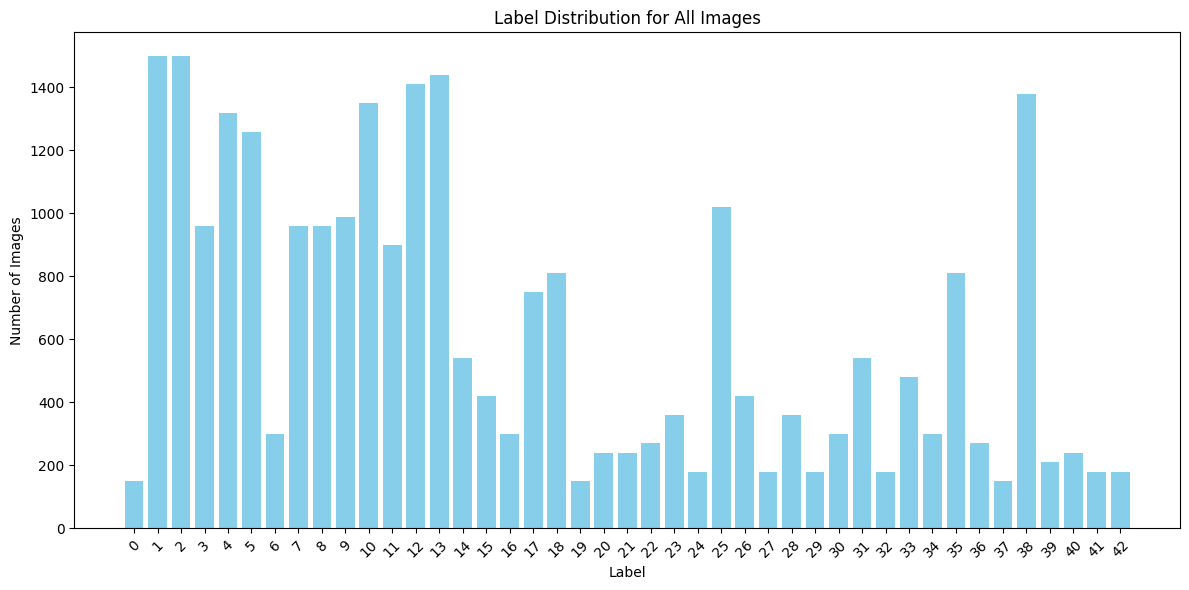

In [ ]:
# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(labels_list, counts, tick_label=labels_list, color='skyblue')
plt.xlabel('Label')
plt.ylabel('Number of Images')
plt.title('Label Distribution for All Images')
plt.xticks(labels_list, rotation=45)
plt.tight_layout()

plt.show()

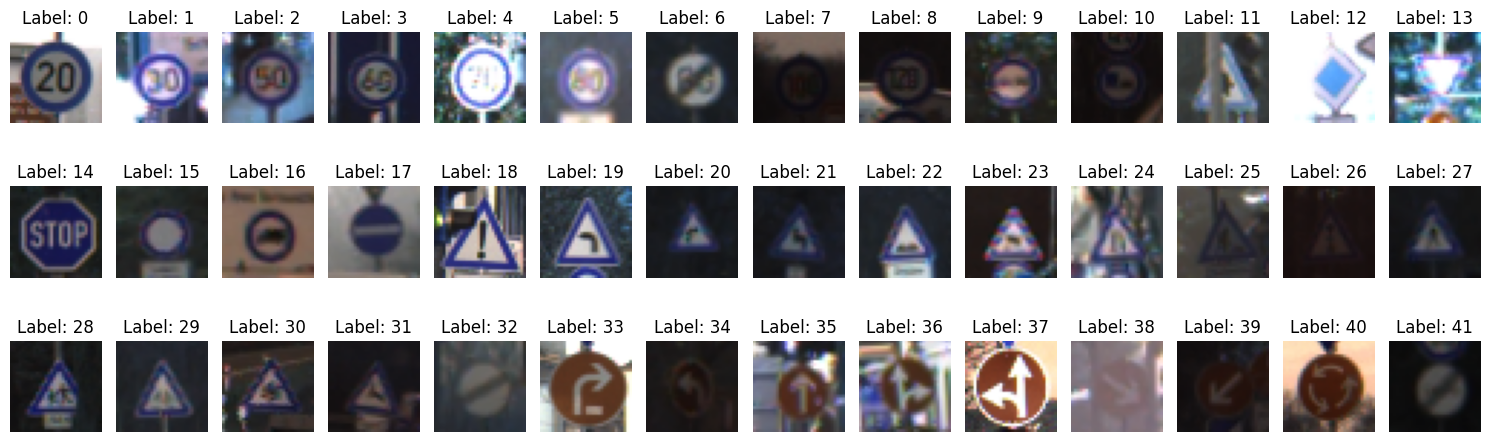

In [ ]:
# Display one image from each label
num_rows = 3
num_columns = 14
num_images_to_display = num_rows * num_columns

# Create a figure with the desired number of subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5))

for i, ax in enumerate(axes.flat):
    if i < len(np.unique(labels)):
        label = np.unique(labels)[i]
        label_indices = np.where(labels == label)[0]

        # Check if there are still unselected images for this label
        if label_indices.size > 0:
            random_index = label_indices[0]  # Select the first unselected image
            label_indices = label_indices[1:]  # Remove the selected image index

            ax.imshow(images[random_index])
            ax.set_title(f"Label: {label}")
            ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()

Ground truth for every test file is also loaded in a pandas dataframe:

ground_truth_df = getData.load_ground_truth(ground_truth)
ground_truth_df.head()

Test images are extracted and stored in numpy dataframe:
test_images = getData.load_testing_images(test_directory)
!python drive/MyDrive/final/data_preparation/testGetData.py

<h1> Data Processing </h1>

Processing images in instance with high system RAM.

 bicubic interpolation

In [ ]:
# Define the path to the getFile.py script
script_path = '/content/drive/MyDrive/final/data_augmentation/processing_image.py'

# Add the script directory to sys.path to import the module
script_dir = os.path.dirname(script_path)
sys.path.append(script_dir)

import processing_image

images_s = images[0:5]

In [ ]:
# Convert the images first
# converted_images = processing_image.convert_image_format(images)

# Call the upscale_images function
upscale_factor = 3
upscaled_images = processing_image.upscale_images(images, upscale_factor)

# Call the equalize_images function
equalized_images = processing_image.equalize_images(upscaled_images)

# Call the laplacian_smoothing function with the converted images
denoised_images = processing_image.denoise_images_parallel(equalized_images)

Streaming output truncated to the last 5000 lines.
excuted once

excuted onceexcuted once

excuted once
excuted onceexcuted onceexcuted once


excuted onceexcuted onceexcuted once
excuted once


excuted once
excuted once
excuted once
excuted once
excuted once
excuted onceexcuted once
excuted once
excuted onceexcuted onceexcuted once



excuted once
excuted onceexcuted onceexcuted once

excuted once

excuted onceexcuted once
excuted once

excuted once
excuted onceexcuted once
excuted onceexcuted once
excuted once


excuted once
excuted onceexcuted once

excuted onceexcuted onceexcuted once


excuted onceexcuted once
excuted once

excuted onceexcuted once

excuted once
excuted once
excuted once
excuted once
excuted onceexcuted once

excuted once
excuted onceexcuted once

excuted onceexcuted once
excuted once
excuted once
excuted once

excuted once
excuted once
excuted once
excuted onceexcuted onceexcuted once


excuted onceexcuted once

excuted onceexcuted onceexcuted once


excuted once

In [ ]:
# Call the histogram_equalization function
smoothed_images = processing_image.gaussian_smoothing(denoised_images)

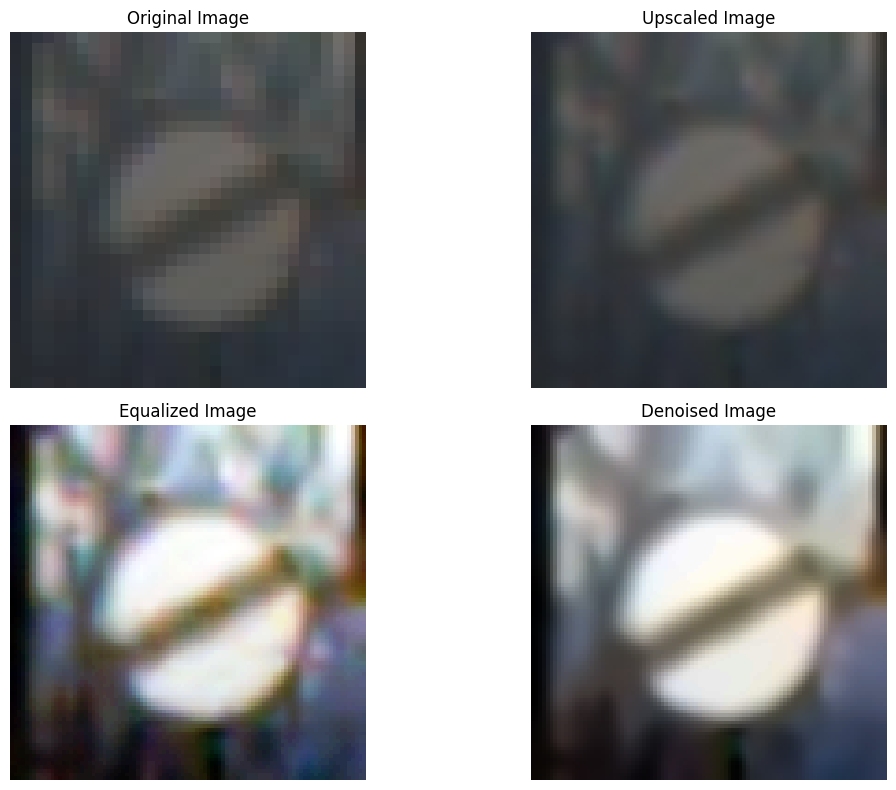

In [ ]:
# Display the original image, upscaled image, denoised image, and histogram-equalized image
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(images[0])
plt.title("Original Image")
plt.axis("off")

# Upscaled Image
plt.subplot(2, 2, 2)
plt.imshow(upscaled_images[0])
plt.title("Upscaled Image")
plt.axis("off")

# Equalized Image
plt.subplot(2, 2, 3)
plt.imshow(equalized_images[0])
plt.title("Equalized Image")
plt.axis("off")

# Denoised Image
plt.subplot(2, 2, 4)
plt.imshow(denoised_images[0])
plt.title("Denoised Image")
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the standard deviation of pixel values
std_dev_old = np.std(images[0])
std_dev_processed = np.std(denoised_images[0])

# Calculate the median absolute deviation (MAD) of pixel values
median_abs_dev_old = np.median(np.abs(images[0] - np.median(images[0])))
median_abs_dev_processed = np.median(np.abs(denoised_images[0] - np.median(denoised_images[0])))

print(f"Standard Deviation (Noise Level before processing): {std_dev_old}")
print(f"Median Absolute Deviation (Noise Level before processing): {median_abs_dev_old}")
print(f"Standard Deviation (Noise Level after processing): {std_dev_processed}")
print(f"Median Absolute Deviation (Noise Level after processing): {median_abs_dev_processed}")

Standard Deviation (Noise Level before processing): 0.0699932724237442
Median Absolute Deviation (Noise Level before processing): 0.05490197241306305
Standard Deviation (Noise Level after processing): 72.0935365824282
Median Absolute Deviation (Noise Level after processing): 62.0


A lower Median Absolute Deviation (MAD) and a lower standard deviation suggest that the pixel values in the image are closer to the central tendency, indicating that there is less variation or spread in the pixel values. This suggests that the processed images have less noise present.

Data augmentation

In [ ]:
denoised_images.shape

(26640, 96, 96, 3)

In [ ]:
def apply_augmentations(image):
    augmented_image = image.copy()

    # Rotation
    angle = np.random.uniform(-45, 45)  # Rotate by up to 45 degrees
    height, width = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    augmented_image = cv2.warpAffine(augmented_image, rotation_matrix, (width, height))

    # Zooming
    scale = np.random.uniform(0.8, 1.2)  # Zoom in/out by up to 20%
    zoom_matrix = np.array([[scale, 0, 0], [0, scale, 0]])
    augmented_image = cv2.warpAffine(augmented_image, zoom_matrix, (width, height))

    # Contrast adjustment
    alpha = np.random.uniform(0.95, 1.05)  # Adjust contrast by up to 5%
    beta = np.random.uniform(-1, 1)   # Adjust brightness by up to 1 units
    augmented_image = cv2.convertScaleAbs(augmented_image, alpha=alpha, beta=beta)

    return augmented_image

In [ ]:
# Calculate the desired number of images per class
desired_images_per_class = 620

# Loop through each class
unique_labels = np.unique(labels)
augmented_images = []
augmented_labels = []

for label in unique_labels:
    # Select images belonging to the current class
    class_indices = np.where(labels == label)[0]
    class_images = denoised_images[class_indices]

    # Calculate how many images need to be augmented
    images_needed = max(0, desired_images_per_class - class_images.shape[0])

    # Augment existing images to meet the desired count
    for _ in range(images_needed):
        # Randomly select an index from the existing images
        random_index = np.random.randint(0, class_images.shape[0])

        # Select the image to be augmented
        image_to_augment = class_images[random_index]

        # Apply augmentation techniques using OpenCV
        augmented_image = apply_augmentations(image_to_augment)

        # Append augmented image and label to the lists
        augmented_images.append(augmented_image)
        augmented_labels.append(label)

# Convert lists to numpy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Concatenate augmented images and original images
final_images = np.concatenate((denoised_images, augmented_images), axis=0)
final_labels = np.concatenate((labels, augmented_labels), axis=0)

In [ ]:
final_images.shape

(35440, 96, 96, 3)

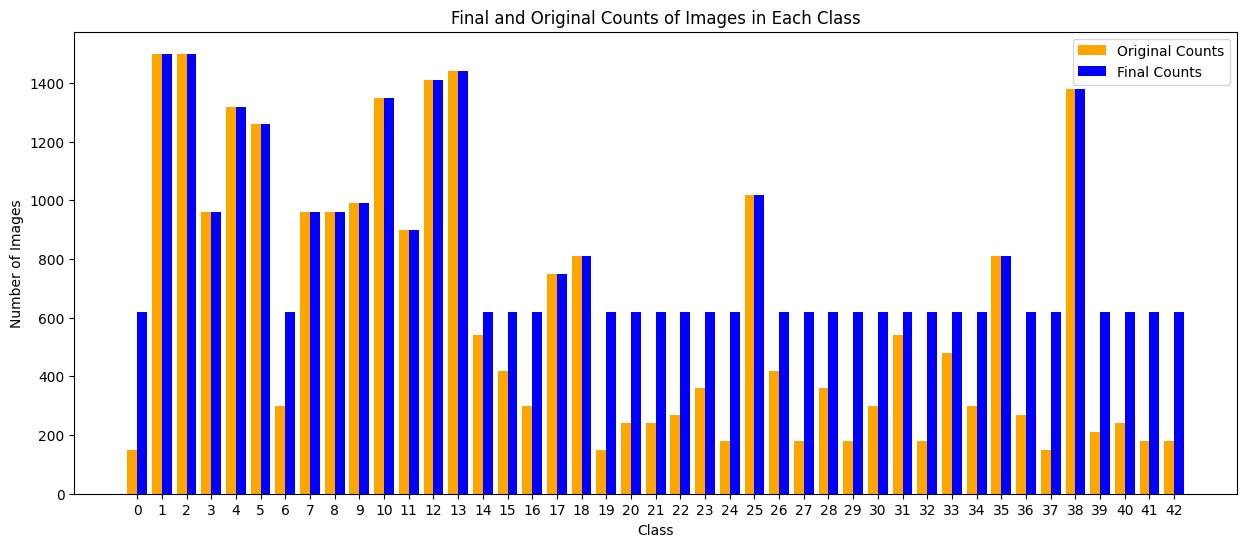

In [ ]:
# Calculate the counts of images in each class for both final and original data
final_class_counts = np.bincount(final_labels)
original_class_counts = np.bincount(labels)

# Number of classes
num_classes = len(final_class_counts)

# Create an array of class labels
class_labels = np.arange(num_classes)

# Calculate the bar width and the gap between original and final counts
bar_width = 0.4
gap = 0.2

# Calculate the positions for the bars
original_bar_positions = class_labels * (2 * bar_width + gap) - bar_width / 2
final_bar_positions = class_labels * (2 * bar_width + gap) + bar_width / 2

# Plot the graph
plt.figure(figsize=(15, 6))

# Plot original counts in orange
plt.bar(original_bar_positions, original_class_counts, color='orange', width=bar_width, label='Original Counts')

# Plot final counts in blue
plt.bar(final_bar_positions, final_class_counts, color='blue', width=bar_width, label='Final Counts')

plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Final and Original Counts of Images in Each Class')
plt.xticks(class_labels * (2 * bar_width + gap), class_labels)  # Adjust xticks positions
plt.legend()
plt.show()


Saving processed images for machine learning in a different instance with GPU.

In [ ]:
# Define the folder path to save the images
save_folder = "/content/augmented_images"
os.makedirs(save_folder, exist_ok=True)

# Save augmented images to the folder
for i, image in enumerate(final_images):
    class_label = final_labels[i]
    filename = f"{class_label}_{i}.png"
    file_path = os.path.join(save_folder, filename)
    cv2.imwrite(file_path, image)

# Create a list of dictionaries for DataFrame
data = []
for i in range(len(final_images)):
    class_label = final_labels[i]
    filename = f"{class_label}_{i}.png"
    data.append({"class": class_label, "filename": filename})

# Create a pandas DataFrame from the list of dictionaries
df = pd.DataFrame(data)

print("Images saved and DataFrame created.")

Images saved and DataFrame created.


In [ ]:
# Specify the directory path
folder_path = '/content/augmented_images'

# List all files in the directory
file_list = os.listdir(folder_path)

# Count the number of files
num_files = len(file_list)

print(f"Number of files in the folder: {num_files}")

Number of files in the folder: 35440


In [ ]:
shutil.make_archive('/content/augmented_images', 'zip', save_folder)

# Move the zip file to Google Drive
zip_path = '/content/augmented_images.zip'
drive_save_path = '/content/drive/MyDrive/final/final_image.zip'
shutil.move(zip_path, drive_save_path)

# Save the DataFrame to a CSV file
df.to_csv("/content/drive/MyDrive/final/image_data.csv", index=False)

print("Images and DataFrame created saved to Google Drive.")

Images and DataFrame created saved to Google Drive.


In [ ]:
# Define the target directory to save augmented images
augmented_output_dir = '/path/to/save/augmented/images'
os.makedirs(augmented_output_dir, exist_ok=True)  # Create the output directory if it doesn't exist

# Save the augmented images to the specified directory
for idx, augmented_image in enumerate(augmented_images):
    label = augmented_labels[idx]  # Get the label for the current image
    base = f'image_{idx:05d}'  # Generate a base name using the index

    output_path = os.path.join(augmented_output_dir, f'{base}_augmented_{label}.png')
    cv2.imwrite(output_path, augmented_image)

# Display a message after saving
print(f"Augmented images saved to: {augmented_output_dir}")

Augmented images saved to: /path/to/save/augmented/images
